In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
file_path = r'F:\studies\datascience\python\pytorch\finger_count\data\train\4\IMG_20200609_200550.jpg'

In [3]:
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (50, 50)).astype(np.float32)/255.0

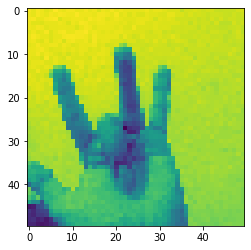

In [4]:
plt.imshow(image)

In [5]:
x = torch.Tensor(image).view(-1, 1, 50, 50)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, 3)
        self.maxpool1 = nn.MaxPool2d(3, 3)
        self.conv2 = nn.Conv2d(4, 8, 3)
        self.maxpool2 = nn.MaxPool2d(3, 3)
        self.flatten_shape = None
        x = torch.randn([50,50]).view(-1,1,50,50)
        x = self.conv(x)
        self.fc1 = nn.Linear(self.flatten_shape, 128)
        self.fc2 = nn.Linear(128, 5)
    
    def conv(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)
        if self.flatten_shape is None:
            self.flatten_shape = x.shape[1] * x.shape[2] * x.shape[3]
        return x
    
    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, self.flatten_shape)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
#         x = self.fc2(x)
        return x

In [7]:
model = Net()
model.load_state_dict(torch.load(os.path.join(os.getcwd(), 'model.pth')))
model.eval()
y_hat = model.forward(x)
print('number of fingers: ' + str(torch.argmax(y_hat, dim=1).item() + 1))

number of fingers: 4
